# Estudio de tipos de trabajo

## 1. Cargando datos

In [23]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (10, 6)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [7]:
df_postulantes_educacion = pd.read_csv("../Data/fiuba_1_postulantes_educacion.csv", low_memory=False)
df_postulantes_genero_y_edad = pd.read_csv("../Data/fiuba_2_postulantes_genero_y_edad.csv", low_memory=False)
df_vistas = pd.read_csv("../Data/fiuba_3_vistas.csv", low_memory=False)
df_postulaciones = pd.read_csv("../Data/fiuba_4_postulaciones.csv", low_memory=False)
df_aviso_online = pd.read_csv("../Data/fiuba_5_avisos_online.csv", low_memory=False)
df_avisos_detalle = pd.read_csv("../Data/fiuba_6_avisos_detalle.csv", low_memory=False)

# 2. Tipos de trabajos

In [8]:
datos = df_avisos_detalle['tipo_de_trabajo'].value_counts()

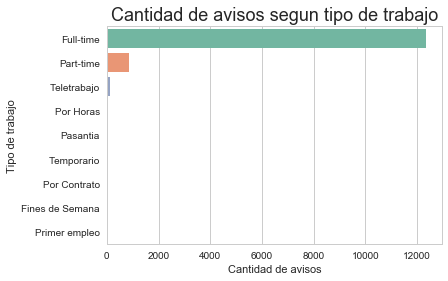

In [9]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette("Set2", 10))
g.set_title('Cantidad de avisos segun tipo de trabajo', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Tipo de trabajo');

Se puede observar que el tipo de trabajo principal es el full-time y luego bastante detras viene Part-time. Respecto a los demas su cantidad es minima.

In [10]:
datos = df_avisos_detalle[-df_avisos_detalle['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]['tipo_de_trabajo'].value_counts()

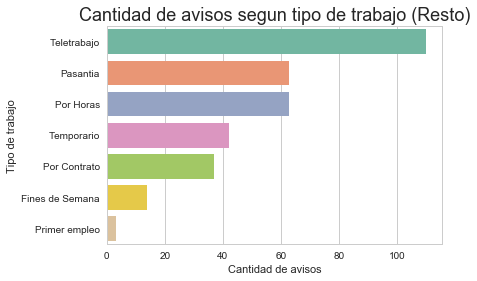

In [11]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette("Set2", 10))
g.set_title('Cantidad de avisos segun tipo de trabajo (Resto)', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Tipo de trabajo');

Se observa una gran cantidad de avisos por teletrabajo y luego pasantia con por horas estan a la par.

# 2.1 Postulaciones vs Vistas

In [12]:
df_vistas.rename(columns={'idAviso': 'idaviso'}, inplace=True)

In [13]:
df_avisos_detalle_vistas = pd.merge(df_avisos_detalle, df_vistas, on='idaviso', how='inner')

In [14]:
df_tipos_vistas = pd.DataFrame(df_avisos_detalle_vistas['tipo_de_trabajo'].value_counts())
df_tipos_vistas.reset_index(inplace=True)

In [15]:
df_avisos_detalle_postulaciones = pd.merge(df_avisos_detalle, df_postulaciones, on='idaviso', how='inner')

In [16]:
df_tipos_postulaciones = pd.DataFrame(df_avisos_detalle_postulaciones['tipo_de_trabajo'].value_counts())
df_tipos_postulaciones.reset_index(inplace=True)

In [17]:
df_tipos_postulaciones.rename(columns={'index':'tipo', 'tipo_de_trabajo':'postulaciones'}, inplace=True)
df_tipos_vistas.rename(columns={'index':'tipo', 'tipo_de_trabajo':'vistas'}, inplace=True)


In [24]:
df_tipo_postulaciones_vistas = pd.merge(df_tipos_postulaciones, df_tipos_vistas, on='tipo', how='inner')

In [25]:
df_tipo_postulaciones_vistas.set_index('tipo',inplace=True)

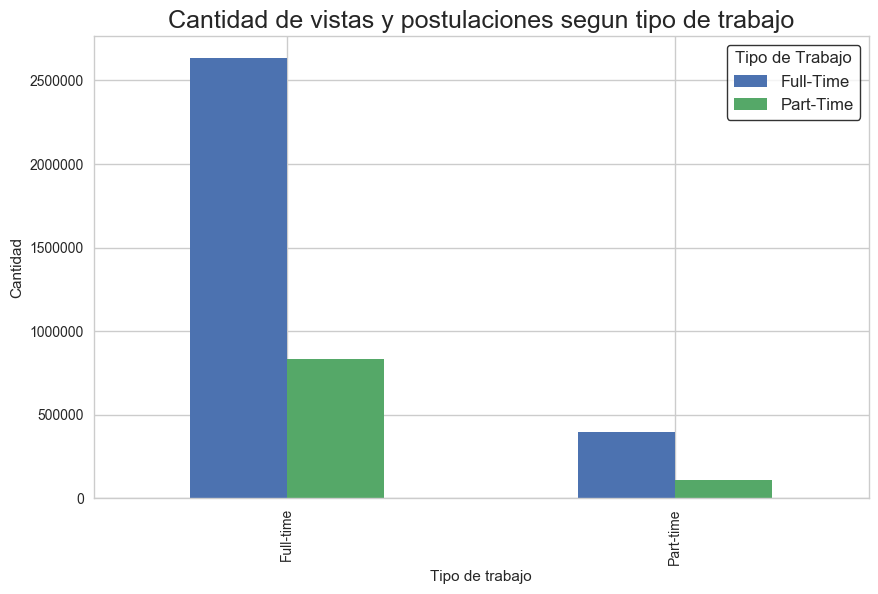

In [26]:
g = df_tipo_postulaciones_vistas.loc[['Full-time', 'Part-time']].plot(kind='bar')
g.set_title('Cantidad de vistas y postulaciones segun tipo de trabajo', fontsize=18);
g.set_ylabel('Cantidad');
g.set_xlabel('Tipo de trabajo')
leyenda=plt.legend(['Full-Time','Part-Time'],fontsize=12,title='Tipo de Trabajo',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

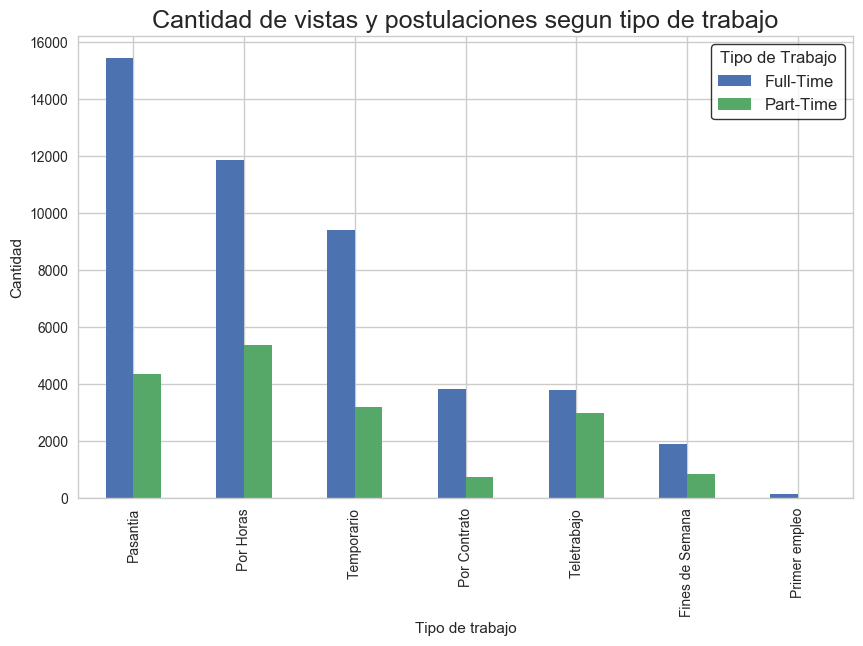

In [27]:
g = df_tipo_postulaciones_vistas.loc['Pasantia':].plot(kind='bar')
g.set_title('Cantidad de vistas y postulaciones segun tipo de trabajo', fontsize=18);
g.set_ylabel('Cantidad');
g.set_xlabel('Tipo de trabajo');
leyenda=plt.legend(['Full-Time','Part-Time'],fontsize=12,title='Tipo de Trabajo',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

# 3. Tipos de trabajo segun area

In [28]:
df_avisos_detalle_ft = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Full-time']
df_avisos_detalle_pt = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Part-time']

## 3.1 Areas con trabajo Full-time

In [29]:
datos = df_avisos_detalle_ft['nombre_area'].value_counts().head(10)

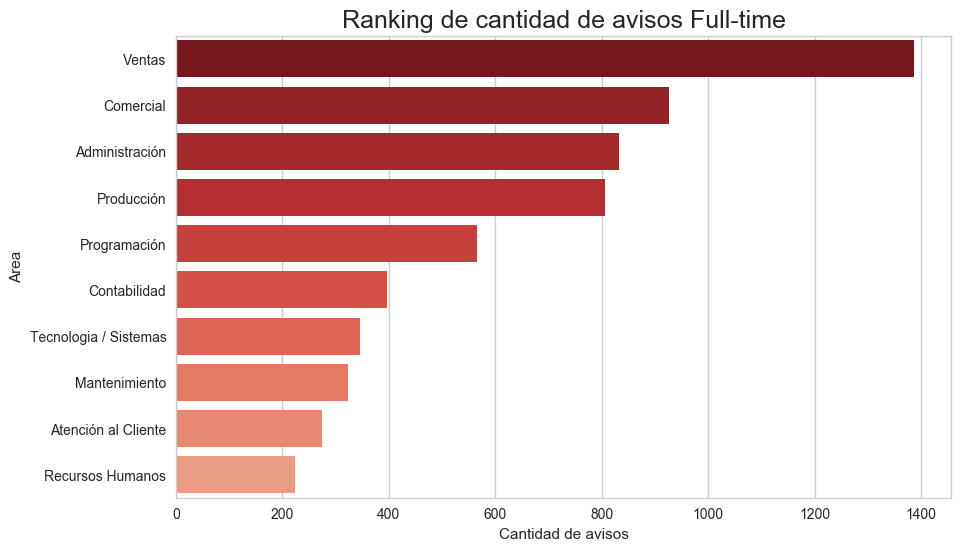

In [30]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Reds_r', 15))
g.set_title('Ranking de cantidad de avisos Full-time', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

Podemos ver que las areas que mas vienen apariciendo en este tp son precisamente las que tienen mas avisos del tipo full-time

## 3.2 Areas de trabajo Part-time

In [31]:
datos = df_avisos_detalle_pt['nombre_area'].value_counts().head(10)

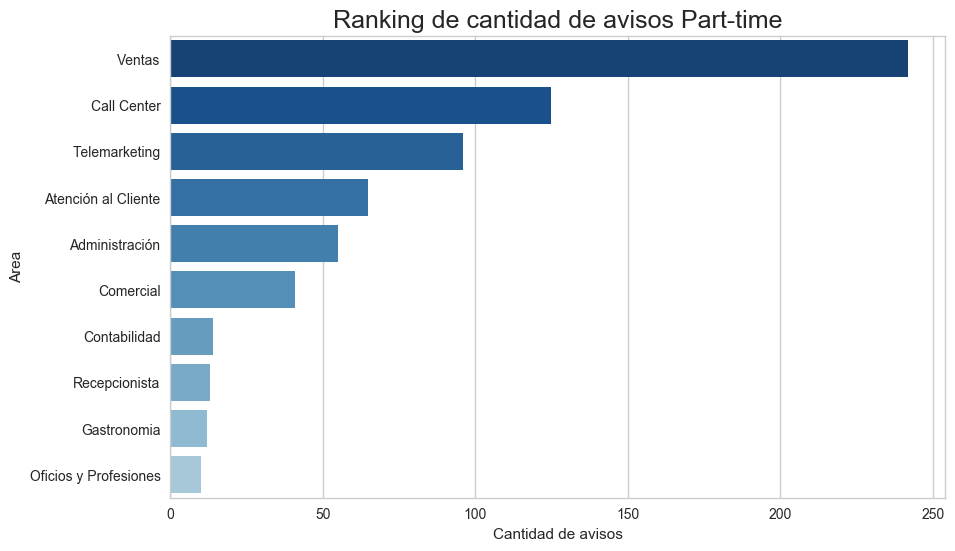

In [32]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Blues_r', 15))
g.set_title('Ranking de cantidad de avisos Part-time', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

A diferencia de full-time, en part-time callcenter, telemarketing y atencion al cliente influyen mucho mas.

## 3.3 Areas Teletrabajo

In [33]:
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Teletrabajo']['nombre_area'].value_counts().head(10)

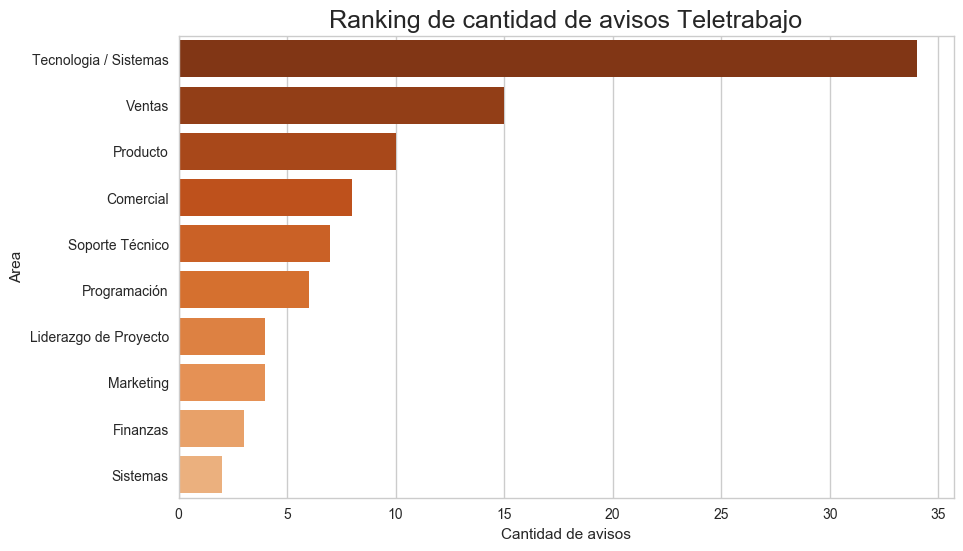

In [34]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Oranges_r', 15))
g.set_title('Ranking de cantidad de avisos Teletrabajo', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.4 Area Pasantia

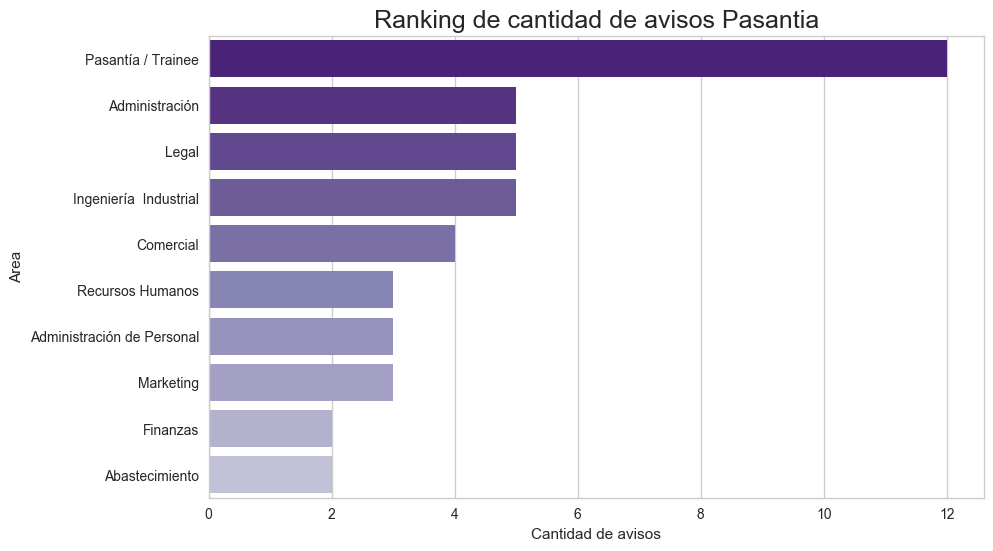

In [35]:
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Pasantia']['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Purples_r', 15))
g.set_title('Ranking de cantidad de avisos Pasantia', fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.5 Area Por horas

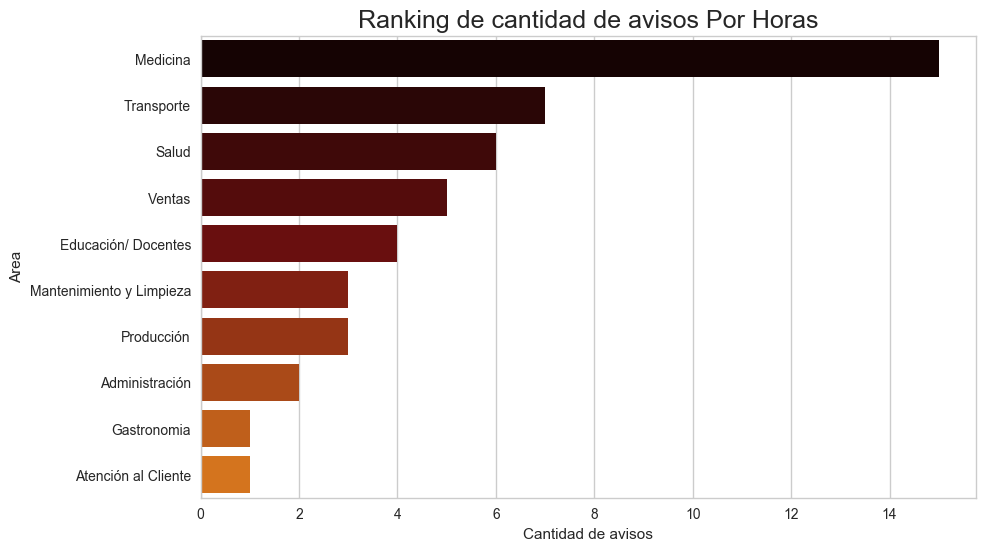

In [36]:
area = 'Por Horas'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('afmhot', 20))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

# 3.6 Temporario

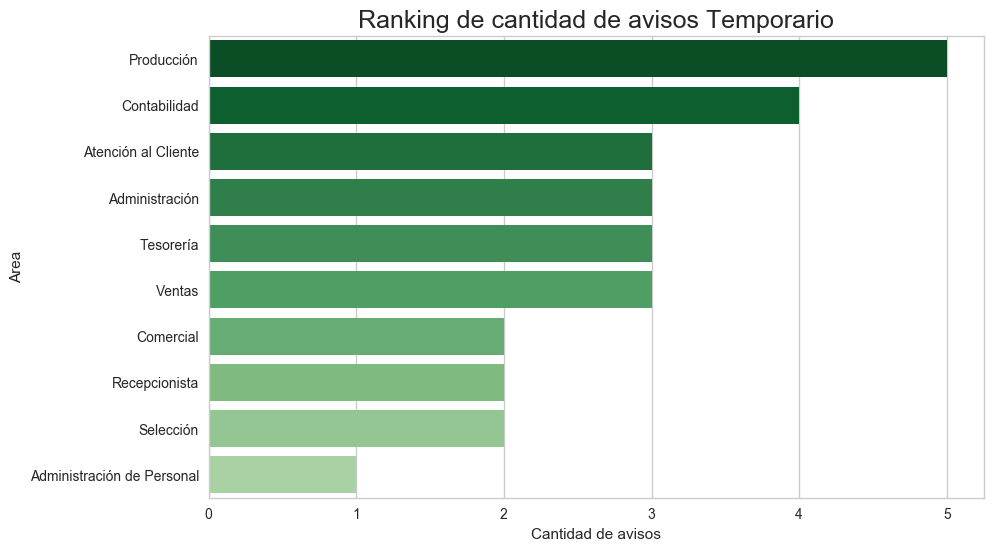

In [37]:
area = 'Temporario'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Greens_r', 15))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.7 Por contrato

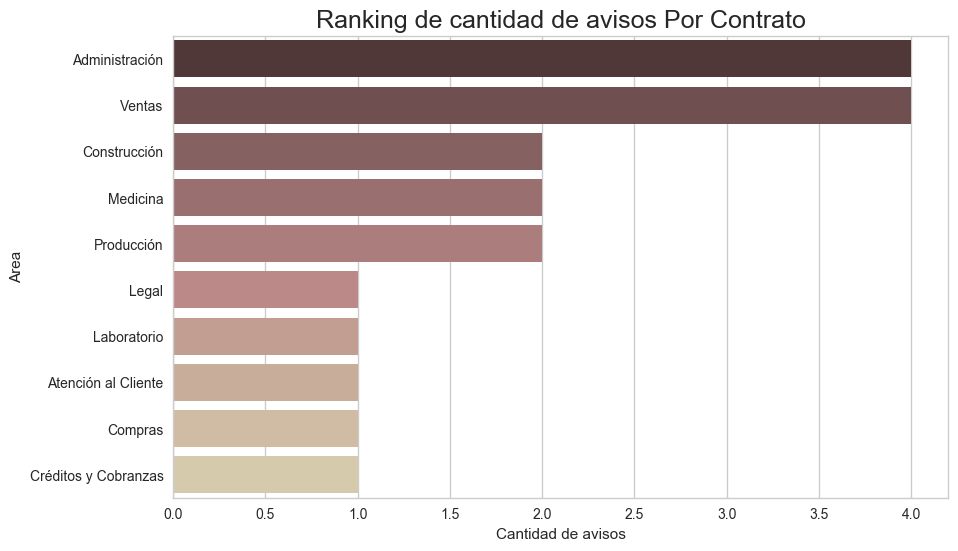

In [38]:
area = 'Por Contrato'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == area]['nombre_area'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('pink', 15))
g.set_title('Ranking de cantidad de avisos {}'.format(area), fontsize=18);
g.set_xlabel('Cantidad de avisos');
g.set_ylabel('Area');

## 3.8 Resumen

In [39]:
df_avisos_no_pt_ft = df_avisos_detalle[-df_avisos_detalle['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]
df_avisos_no_pt_ft['nivel'] = 1

/home/victor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df_areas_ppales = df_avisos_no_pt_ft[
    df_avisos_no_pt_ft['nombre_area'].isin(['Ventas', 'Tecnología', 'Comercial', 'Legal', 'Administración', 
                                            'Producción', 'Medicina', 'Contabilidad', 'Construcción', 'Sistemas',
                                            'Programación', 'Transporte', 'Salud'])
    | (df_avisos_no_pt_ft['nombre_area'].str.contains('Industrial'))
    | (df_avisos_no_pt_ft['nombre_area'].str.contains('Trainee'))
]

In [41]:
tabla = df_areas_ppales[['nombre_area', 'tipo_de_trabajo', 'nivel']].pivot_table(
    index='nombre_area', columns='tipo_de_trabajo', values='nivel', aggfunc='sum'
)

In [42]:
tabla

tipo_de_trabajo,Fines de Semana,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nombre_area,,,,,,,
Administración,NaN,5.0,4.0,2.0,NaN,NaN,3.0
Comercial,NaN,4.0,NaN,1.0,NaN,8.0,2.0
Construcción,NaN,NaN,2.0,NaN,NaN,NaN,1.0
Contabilidad,NaN,NaN,1.0,NaN,NaN,NaN,4.0
Ingeniería Industrial,NaN,5.0,NaN,NaN,NaN,NaN,1.0
Legal,NaN,5.0,1.0,1.0,NaN,NaN,NaN
Medicina,1.0,NaN,2.0,15.0,NaN,NaN,1.0
Pasantía / Trainee,NaN,12.0,NaN,NaN,NaN,NaN,NaN
Producción,NaN,1.0,2.0,3.0,NaN,NaN,5.0


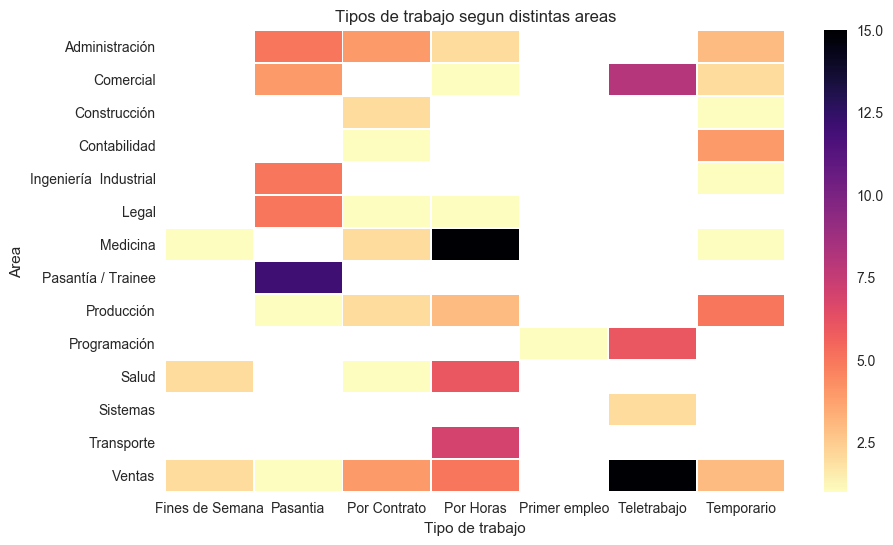

In [43]:
g = sns.heatmap(tabla, cmap='magma_r', linewidths=0.5)
g.set_title('Tipos de trabajo segun distintas areas');
g.set_ylabel('Area');
g.set_xlabel('Tipo de trabajo');

## 4. Segun sexo

In [44]:
# Filtro las edades
df_postulantes_genero_y_edad['fechanacimiento_dt'] = pd.to_datetime(df_postulantes_genero_y_edad['fechanacimiento'],
                                                                   errors='coerce')

In [45]:
df_postulantes_genero_y_edad['edad'] = 2018 - df_postulantes_genero_y_edad['fechanacimiento_dt'].dt.year

In [46]:
df_postulantes_genero_y_edad = df_postulantes_genero_y_edad[
    (df_postulantes_genero_y_edad['edad'] >= 18)
    & (df_postulantes_genero_y_edad['edad'] <= 65)
]

In [52]:
df_postulantes_genero_y_edad =df_postulantes_genero_y_edad[df_postulantes_genero_y_edad['sexo'] != 'NO_DECLARA']

In [53]:
df_postulaciones_sexo = pd.merge(df_postulantes_genero_y_edad, df_postulaciones,
                                on='idpostulante', how='inner')

In [49]:
df_avisos_sexo = pd.merge(df_postulaciones_sexo, df_avisos_detalle, on='idaviso', how='inner')

In [50]:
datos_pt_ft = df_avisos_sexo[df_avisos_sexo['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]
datos_no_pt_ft = df_avisos_sexo[-df_avisos_sexo['tipo_de_trabajo'].isin(['Full-time', 'Part-time'])]

## 4.1 Full-time y Part-time

### 4.1.1 Postulacioes

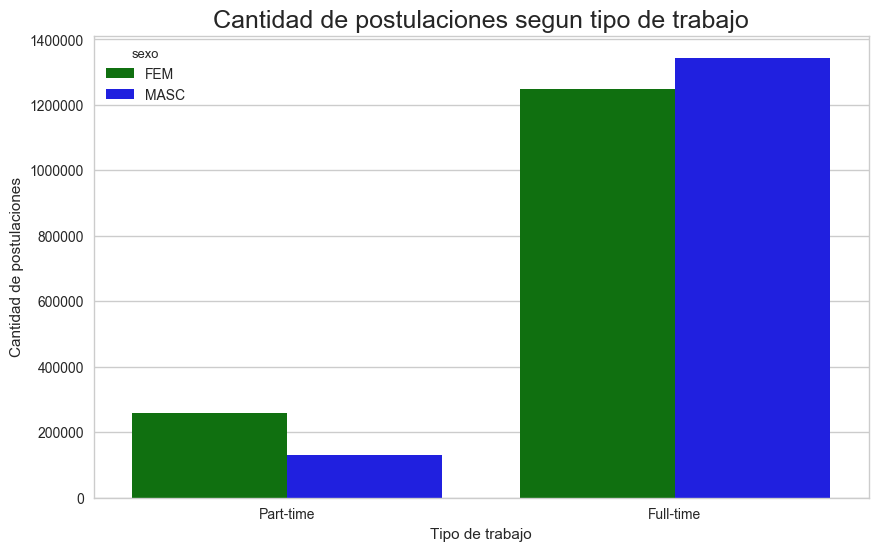

In [51]:
g = sns.countplot(x='tipo_de_trabajo', hue='sexo', data=datos_pt_ft, palette=['Green', 'Blue'])
g.set_title('Cantidad de postulaciones segun tipo de trabajo', fontsize=18);
g.set_xlabel('Tipo de trabajo');
g.set_ylabel('Cantidad de postulaciones');

Hay mas mujeres en part-time, pero mas hombres en full-time

## 4.2 Resto

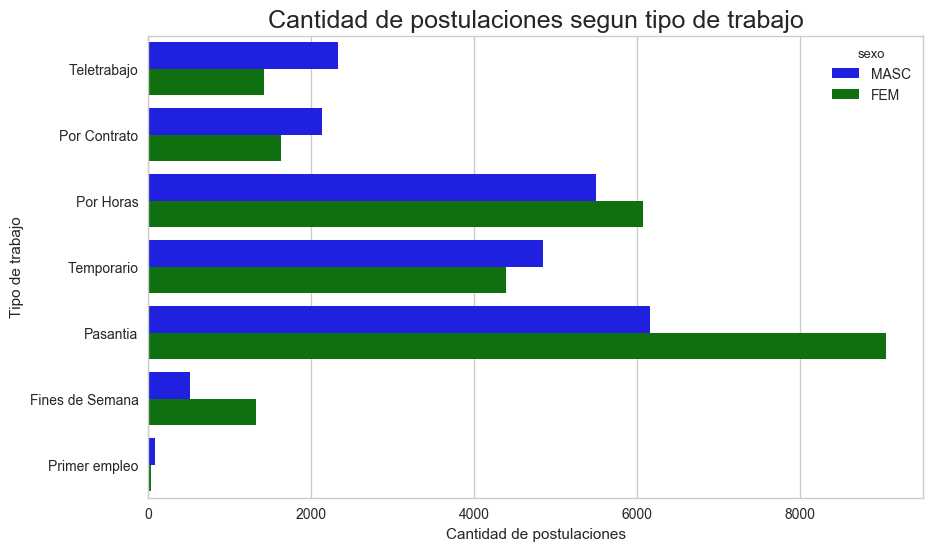

In [54]:
g = sns.countplot(y='tipo_de_trabajo', hue='sexo', data=datos_no_pt_ft, palette=['Blue', 'Green'])
g.set_title('Cantidad de postulaciones segun tipo de trabajo', fontsize=18);
g.set_ylabel('Tipo de trabajo');
g.set_xlabel('Cantidad de postulaciones');

# 5. Edad

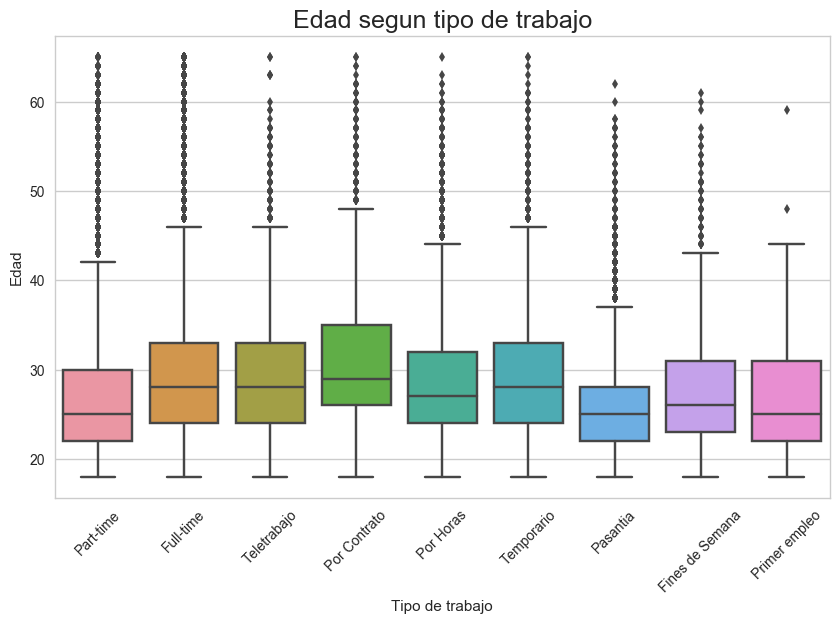

In [55]:
g = sns.boxplot(x='tipo_de_trabajo', y='edad', data=df_avisos_sexo)
g.set_title('Edad segun tipo de trabajo', fontsize=18);
g.set_ylabel('Edad');
g.set_xlabel('Tipo de trabajo');
g.set_xticklabels(g.get_xticklabels(), rotation=45);

- Mayor edad = Por contrato, luego Full-time y teletrabajo.
- menor edad = Part-time y pasantia
- mayoria bajo los 40 años

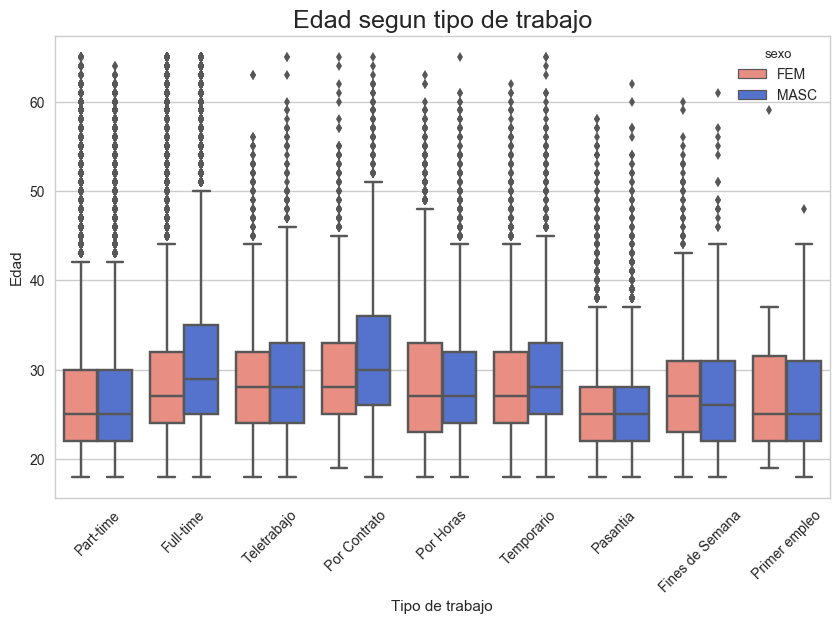

In [56]:
g = sns.boxplot(x='tipo_de_trabajo', hue='sexo', y='edad', data=df_avisos_sexo, palette=['salmon','royalblue'])
g.set_title('Edad segun tipo de trabajo', fontsize=18);
g.set_ylabel('Edad');
g.set_xlabel('Tipo de trabajo');
g.set_xticklabels(g.get_xticklabels(), rotation=45);

## 6. Empresas

## 6.1 Empresas Full-time

In [57]:
datos = df_avisos_detalle_ft['denominacion_empresa'].value_counts().head(10)

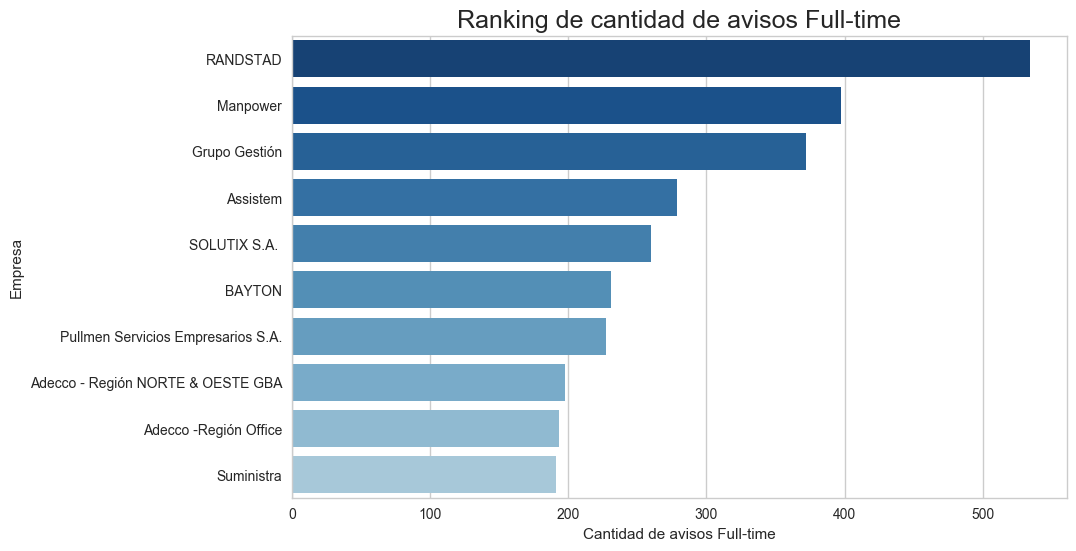

In [58]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Blues_r', 15))
g.set_title('Ranking de cantidad de avisos Full-time', fontsize=18);
g.set_xlabel('Cantidad de avisos Full-time');
g.set_ylabel('Empresa');

## 6.2 Part-time

In [59]:
datos = df_avisos_detalle_pt['denominacion_empresa'].value_counts().head(10)

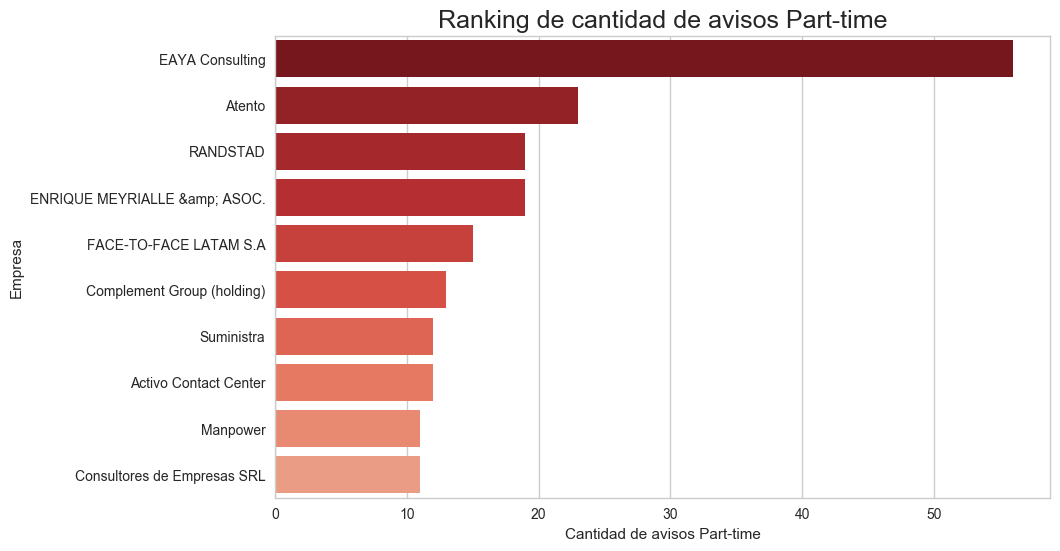

In [60]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Reds_r',15))
g.set_title('Ranking de cantidad de avisos Part-time', fontsize=18);
g.set_xlabel('Cantidad de avisos Part-time');
g.set_ylabel('Empresa');

### 6.3 Teletrabajo

In [61]:
tipo = 'Teletrabajo'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)

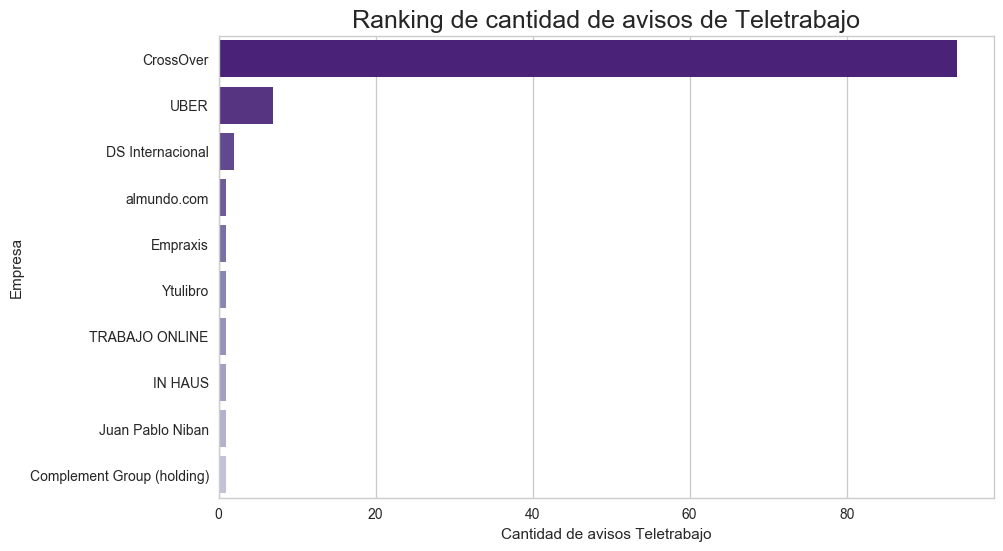

In [62]:
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Purples_r', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

In [73]:
tipo = 'Teletrabajo'
datos = df_avisos_detalle[(df_avisos_detalle['tipo_de_trabajo'] == tipo) 
                          & (df_avisos_detalle['denominacion_empresa'] == 'UBER')]

In [83]:
datos['descripcion'].values[0]

'<p>GANÁ SIN MANEJAR ! ACTIVIDAD INDEPENDIENTE</p><p>\xa0</p><p>Para ser un Doster no necesitás ser ni socio-conductor ni usuario de Uber. Dost es un programa de referidos en el cual podrás referir nuevos conductores a la plataforma y ganar mucho dinero.</p><p>\xa0</p><p>Si tenés experiencia en marketing digital o como ejecutivo comercial, pasión por las ventas, o simplemente contás con conocidos a los que puedas recomendar para manejar con UBER, esta es tu gran oportunidad.</p><p><br /><br /></p><p>UberDOST es un programa que te permite ganar dinero por sumar nuevos socios conductores que manejen con Uber. Con UberDOST ganas entre $4.000 y $5.500, por cada socio conductor que refieras y complete 20 viajes.</p><p>\xa0</p><p>UBER está buscando personas con espiritu emprendedor, que deseen trabajar y ganar dinero en forma independiente, refiriendo nuevos socios conductores para nuestra plataforma, podés desarrollar una estrategia para captar conductores potenciales o bien \xa0podés refer

### 6.4 Por Contrato

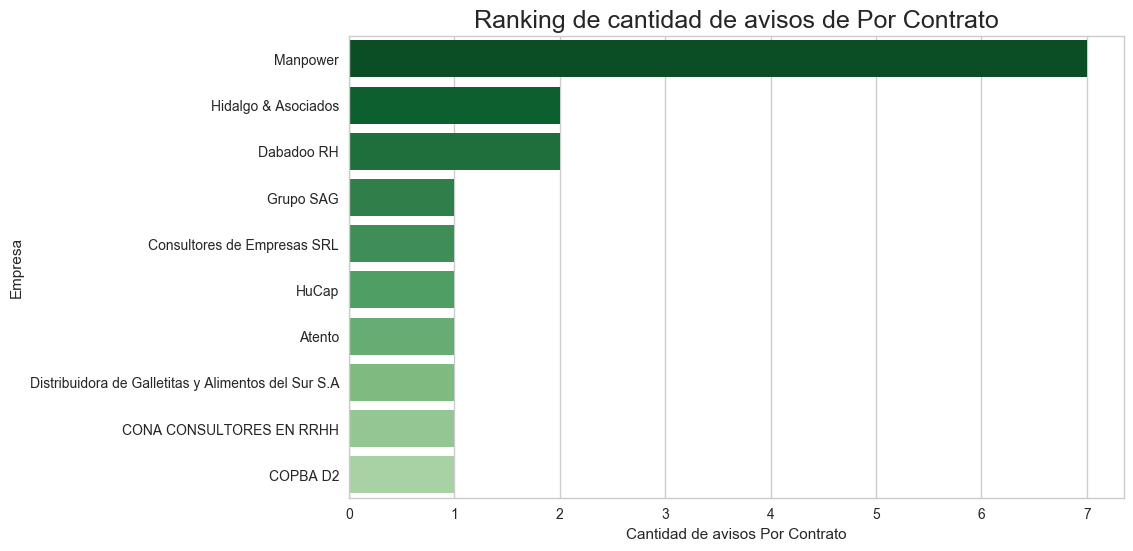

In [63]:
tipo = 'Por Contrato'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Greens_r', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

## 6.5 Por horas

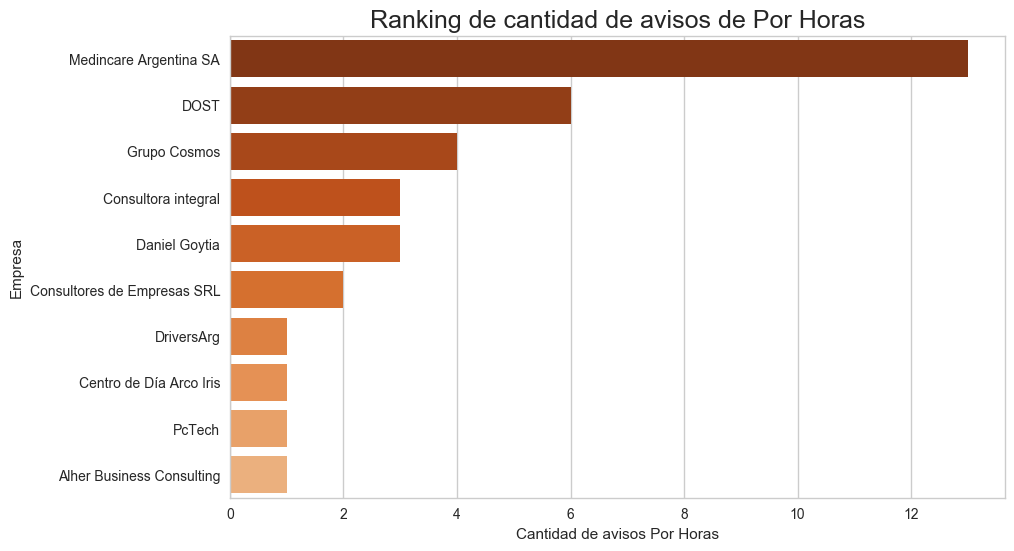

In [64]:
tipo = 'Por Horas'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Oranges_r', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

### 6.6 Temporario

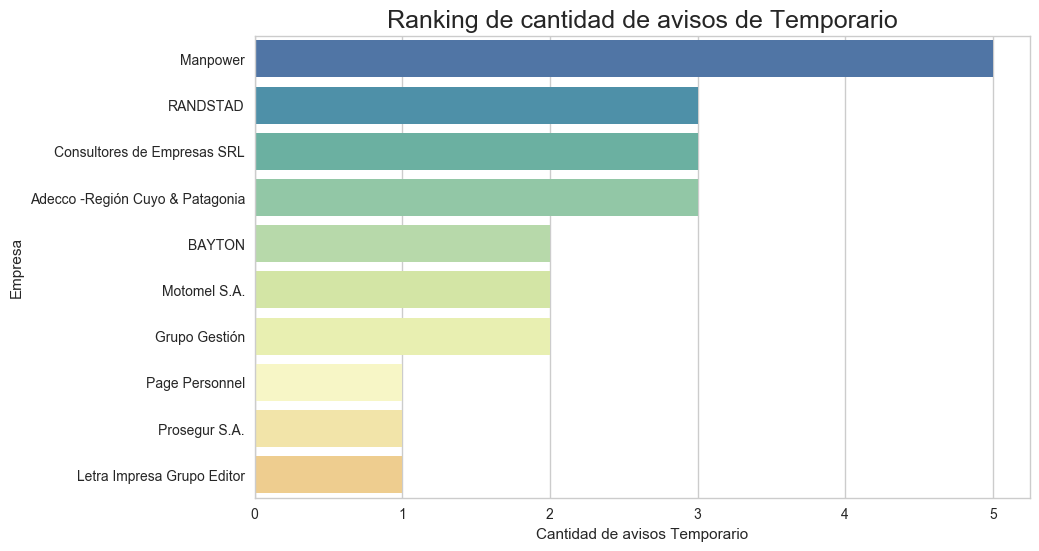

In [65]:
tipo = 'Temporario'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('Spectral_r', 15) )
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

## 6.7 Pasantia

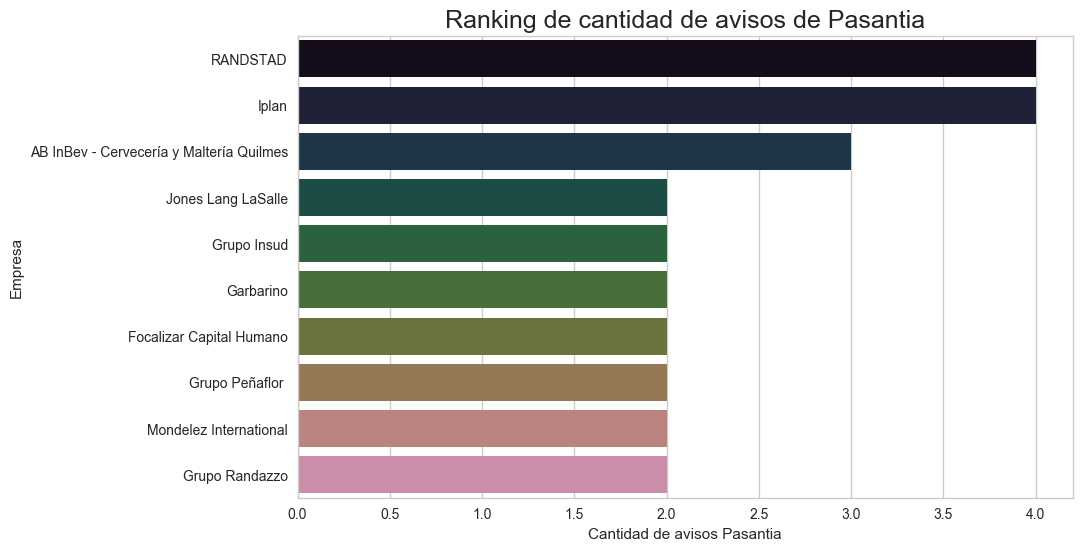

In [84]:
tipo = 'Pasantia'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette=sns.color_palette('cubehelix', 15))
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

In [87]:
df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
313,1112084829,1,Pasante en Custemer Experience,<p>En Garbarino buscamos una persona que quier...,Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Abastecimiento,Garbarino
576,1112213814,1,Programa de Pasantías MONSANTO 2018,<p>Nuestro programa de pasantías tiene como ob...,Gran Buenos Aires,NaN,NaN,Pasantia,Senior / Semi-Senior,Pasantía / Trainee,Cia de Talentos
769,1112216670,1,Pasantías Supply Zárate,<p>Área del puesto: Supply Chain</p><p>Tipo de...,Gran Buenos Aires,NaN,NaN,Pasantia,Otro,Otras Ingenierias,AB InBev - Cervecería y Maltería Quilmes
1319,1112279677,1,Human Resources Intern - Part time,"<p style=""""><span>JLL (NYSE: JLL) is a profess...",Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Administración de Personal,Jones Lang LaSalle
1504,1112282819,1,PROCURADOR,"<p style="""">Nos encontramos en búsqueda de <st...",Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Legal,ESTUDIO OLIVA
1718,1112285890,1,Human Resources Intern - Full time,<p>JLL (NYSE: JLL) is a professional services ...,Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Administración de Personal,Jones Lang LaSalle
2386,1112349559,1,Pasante de Recursos Humanos,<p>Seleccionaremos para Importante Empresa Mul...,Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Recursos Humanos,RANDSTAD
2575,1112352366,1,Pasantia en Marketing Digital ( Digital profes...,<p>Seleccionaremos para importante Empresa Mul...,Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Community Management,RANDSTAD
2778,1111308362,1,Nuevas Vacantes - Programa de Pasantías Ford A...,"<p> </p><p style=""""><span style=""""><span style...",Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Ingeniería Industrial,Hidalgo & Asociados
2872,1111710584,1,Programa de Pasantías #PrimerosPasosBBVA,<p>&lt;p&lt;p</p><p>Programa de Pasantías <str...,Gran Buenos Aires,NaN,NaN,Pasantia,Junior,Jóvenes Profesionales,BBVA Francés


## 6.8 Fines de semana

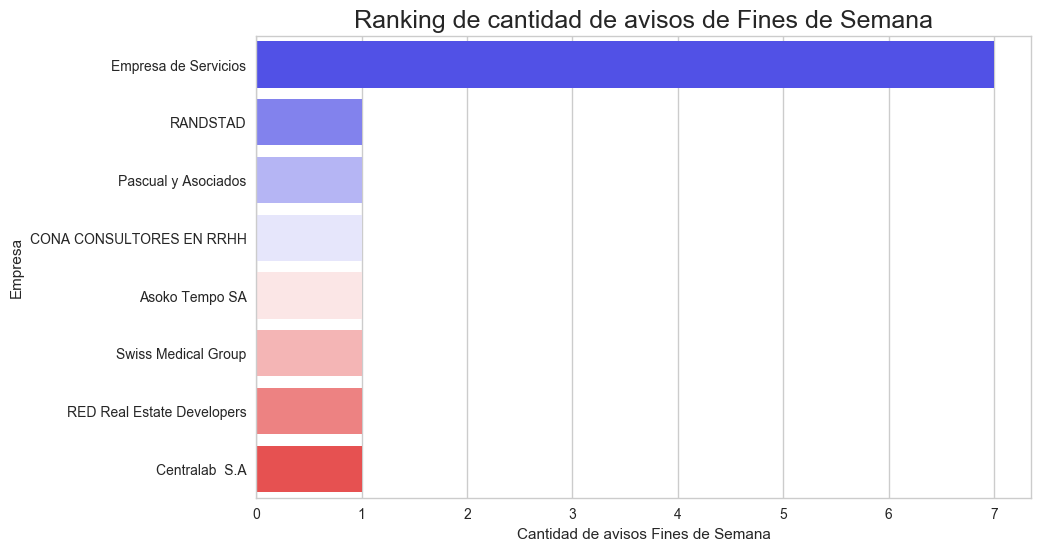

In [67]:
tipo = 'Fines de Semana'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values, palette='bwr')
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

In [88]:
datos = df_avisos_detalle[(df_avisos_detalle['tipo_de_trabajo'] == 'Fines de Semana')]
datos

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
257,1111959242,1,CAMAREROS/FINES DE SEMANA - URGENTE!!,"<p><strong>ASOKO TEMPO, selecciona CAMAREROS/M...",Gran Buenos Aires,NaN,NaN,Fines de Semana,Junior,Camareros,Asoko Tempo SA
265,1111958584,1,Técnico de Laboratorio para guardias,<p>Nos encontramos en la búsqueda de un Técnic...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Otro,Salud,Centralab S.A
2560,1112352232,1,Nutricionista Franquera para Servicio de Alime...,<p>Somos una importante Empresa Gastronómica c...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Prácticas Profesionales,Empresa de Servicios
5046,1112361663,1,Nutricionista Turno tarde para Servicio de Ali...,<p>Somos una importante Empresa Gastronómica c...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Prácticas Profesionales,Empresa de Servicios
5509,1111459234,1,Nutricionista Franquera para Servicio de Alime...,<p>Somos una importante Empresa Gastronómica c...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Gastronomia,Empresa de Servicios
6621,1112303352,1,Nutricionista Franquera para Servicio de Alime...,<p>Somos una importante Empresa Gastronómica c...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Prácticas Profesionales,Empresa de Servicios
7219,1112313092,1,Nutricionista Franquera Part time. Clínica Pri...,<p>Somos una importante Empresa Gastronómica c...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Prácticas Profesionales,Empresa de Servicios
7996,1112377787,1,Vendedor/a Emprendimiento Inmobiliario IN Lope...,Buscamos una persona para la posicion de Vende...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Ventas,RED Real Estate Developers
8585,1112194127,1,Kinesiológo / Sanatorio De Los Arcos,"<p style="""">Swiss Medical Group convoca Kinesi...",Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Salud,Swiss Medical Group
9874,1112321894,1,Nutricionista Franquera para Servicio de Alime...,<p>Somos una importante Empresa Gastronómica c...,Gran Buenos Aires,NaN,NaN,Fines de Semana,Senior / Semi-Senior,Prácticas Profesionales,Empresa de Servicios


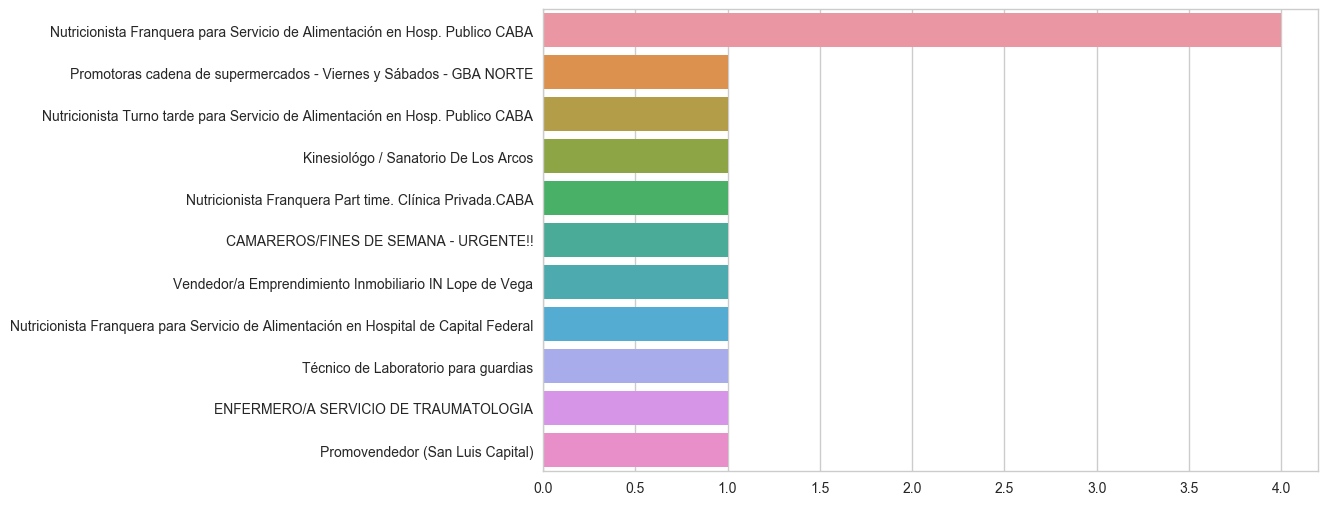

In [69]:
g = sns.barplot(y=datos.index, x=datos.values)

###  6.9 Primer empleo

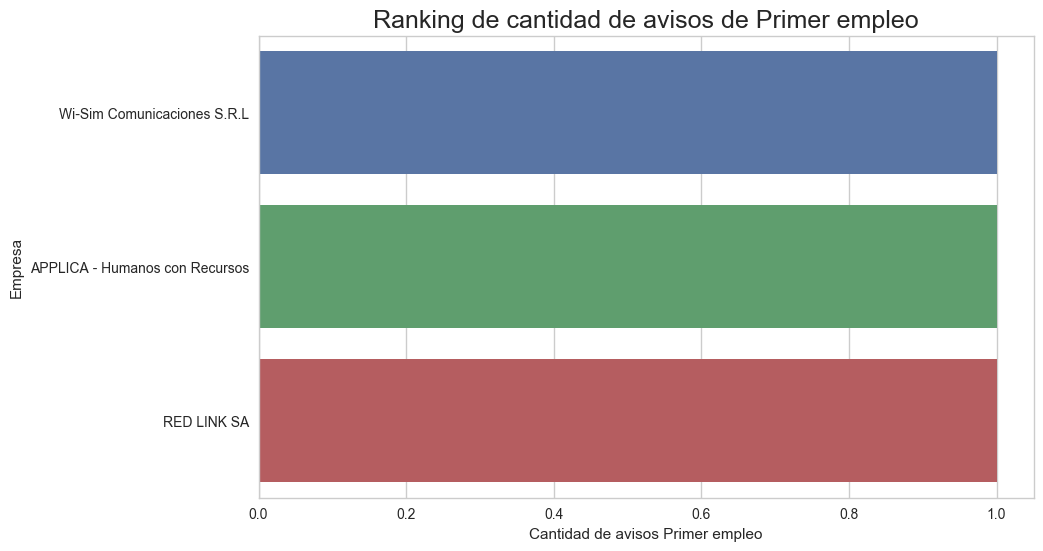

In [70]:
tipo = 'Primer empleo'
datos = df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == tipo]['denominacion_empresa'].value_counts().head(10)
g = sns.barplot(y=datos.index, x=datos.values)
g.set_title('Ranking de cantidad de avisos de {}'.format(tipo), fontsize=18);
g.set_xlabel('Cantidad de avisos {}'.format(tipo));
g.set_ylabel('Empresa');

In [71]:
df_avisos_detalle[df_avisos_detalle['tipo_de_trabajo'] == 'Primer empleo']['titulo']

2880                          Programa Trainee INICIA2017
6111    Personal con conocimientos en informática y redes
6155    Vendedor de Seguros -  Estudiantes de La Tecni...
Name: titulo, dtype: object

In [ ]:
df_avisos_detalle.head()